In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
# Skip the commented header line that starts with #
vmc_path = "../data/results.dat"
df_VMC = pd.read_csv(vmc_path, delim_whitespace=True, comment='#', names=["U", "kappa", "energy", "sem"])

exact_path = "../data/exact_1D_10_10.dat"
df_exact = pd.read_csv(exact_path, delim_whitespace=True, comment="#", header=None)
df_exact.columns = ["U", "E0", "E1", "gap", "mu", "cond", "kappa_exact", "sf", "entropy", "variance"]

df = pd.merge(df_exact, df_VMC, on="U")
df.head()


,U,E0,E1,gap,mu,cond,kappa_exact,sf,entropy,variance,kappa,energy,sem
0,1.0,-16.360486,-19.489670,3.129184,1.601525,0.093800,1.394409,0.036664,1.980086,0.293316,2.989803,-112.085732,0.102752
1,2.0,-13.535967,-18.656496,5.120529,1.493330,0.127659,1.264016,0.053049,1.919919,0.366878,2.989803,-111.999794,0.102684
2,3.0,-11.193913,-17.602329,6.408416,1.400145,0.147413,1.146629,0.063114,1.864490,0.409437,2.989803,-111.913856,0.102616
3,4.0,-9.251593,-16.252032,7.000439,1.292443,0.165206,0.993954,0.074808,1.799832,0.436978,2.989803,-111.827918,0.102549
4,5.0,-7.692948,-14.538391,6.845443,1.137049,0.174864,0.778945,0.089244,1.696920,0.433371,2.989803,-111.741980,0.102481


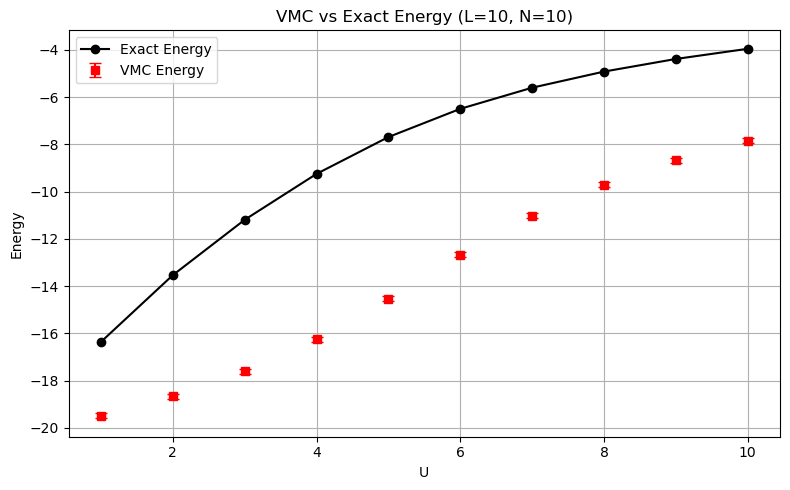

In [8]:
plt.figure(figsize=(8, 5))
plt.plot(df["U"], df["E0"], label="Exact Energy", marker='o', color='black')
plt.errorbar(df["U"], df["E1"], yerr=df["sem"], label="VMC Energy", fmt='s', capsize=4, color='red')

plt.xlabel("U")
plt.ylabel("Energy")
plt.title("VMC vs Exact Energy (L=10, N=10)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()